# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [72]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [73]:
print('Количество спам-писем', data[data['label'] == 1]['label'].count())
print('Количество не спам-писем', data[data['label'] == 0]['label'].count())

Количество спам-писем 500
Количество не спам-писем 2500


0    0.833333
1    0.166667
Name: label, dtype: float64

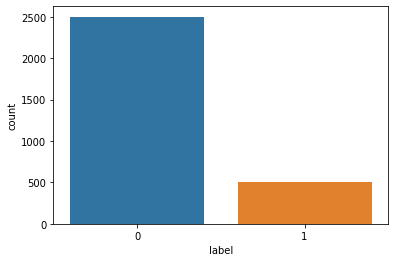

In [74]:
import seaborn as sns

display(data['label'].value_counts(normalize=True))
sns.countplot(data=data, x='label');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [76]:
print(data.info()) # Проверяем датасет на наличие пропущенных значений
data = data.fillna(np.nan)
data = data.dropna()

print(data.info()) # Контрольная проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB
None


Переводим данные в векторный вид:

In [77]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [78]:
print('Количество признаков после преобразования данных в векторный вид', X.shape[1])

Количество признаков после преобразования данных в векторный вид 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [79]:
y = data['label']
X_data = X


Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [81]:
print('Среднее значение целевой переменной по тестовой выборке', y_test.mean())

Среднее значение целевой переменной по тестовой выборке 0.164


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [82]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB(alpha=0.01)
complement_nb.fit(X_train, y_train)
y_train_pred = complement_nb.predict(X_train)
y_test_pred = complement_nb.predict(X_test)
y_test_pred_proba = complement_nb.predict_proba(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [83]:
from sklearn import metrics

print('Accuracy на тестовой выборке', round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Precision на тестовой выборке', round(metrics.precision_score(y_test, y_test_pred), 3))
print('Recall на тестовой выборке', round(metrics.recall_score(y_test, y_test_pred), 3))
print('F1-score на тестовой выборке', round(metrics.f1_score(y_test, y_test_pred), 3))

Accuracy на тестовой выборке 0.995
Precision на тестовой выборке 0.984
Recall на тестовой выборке 0.984
F1-score на тестовой выборке 0.984


Нарисуйте ROC-кривую:

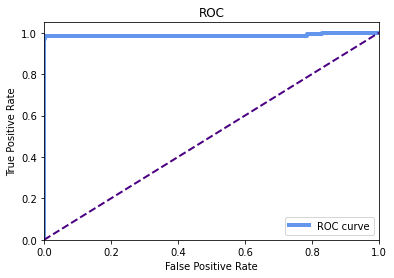

No Skill: ROC AUC=0.98683
Naive Bayes: ROC AUC=0.50000


In [84]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba[:,1], drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color="cornflowerblue", lw=4,  label="ROC curve")
plt.plot([0, 1], [0, 1], color="indigo", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

print('No Skill: ROC AUC=%.5f' % (roc_auc))
print('Naive Bayes: ROC AUC=%.5f' % 0.5)

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric erro

Наилучшие значения параметров: {'alpha': 0.1}
F1-score на тестовой выборке 0.9877551020408164


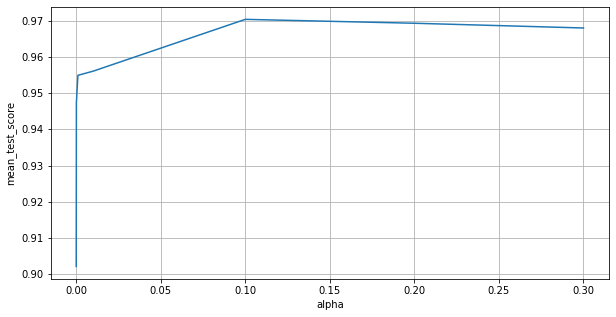

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

grid_search = GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1,
    scoring='f1'
)
grid_search.fit(X_train, y_train) 
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))

y_test_pred = grid_search.predict(X_test)
y_test_pred_proba = grid_search.predict_proba(X_test)
print('F1-score на тестовой выборке', metrics.f1_score(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=param_grid['alpha'], y=grid_search.cv_results_['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('mean_test_score')
ax.grid()

Анализируя график средней метрики качества на тестовой выборке, можно увидеть, что до параметра alpha=0.1 включительно кривая растет, а после alpha=0.2 начинает убывать. То есть от параметра alpha зависит качество классификации.